# 01. Ridership Trend Analysis

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import dates
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('transit-ridership.csv')

In [3]:
df = pd.read_csv('transit-ridership.csv') #First read all the data from the csv file
df= df.rename(columns={'Unnamed: 0': 'Year'}) #Rename the unnamed column title to 'Year'
for i in df.columns: #for each column
    df[i] = df[i].replace(",", "", regex=True) #remove all the commas in between each values
df = df._convert(numeric=True) #convert the elements to numeric values
df

,Year,July,October,December,February,Total
0,FY97,287136,1052714,807508,1157678,9501302.0
1,FY98,289269,1142300,753231,982453,8670906.0
2,FY99,281914,1055683,673696,1006772,8628101.0
3,FY00,297848,1060153,650067,1091131,8800655.0
4,FY01,270213,1085119,825356,1159928,10102665.0
5,FY02,286552,1227976,524747,1118989,9084277.0
6,FY03,311041,1169216,787201,1133363,9369218.0
7,FY04,338494,1305943,813161,1154057,10435923.0
8,FY05,341083,1217625,739941,1200637,10136585.0
9,FY06,289169,1135129,736504,1167974,9958497.0


In [4]:
df.describe()

,July,October,December,February,Total
count,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,2.500000e+01
mean,353758.269231,1.200681e+06,7.662968e+05,1.181454e+06,1.018373e+07
std,80252.448764,2.425953e+05,1.791262e+05,2.563263e+05,2.005362e+06
min,226004.000000,3.437650e+05,2.141830e+05,3.180710e+05,3.480360e+06
25%,289194.000000,1.130592e+06,6.893980e+05,1.122582e+06,9.365436e+06
50%,339788.500000,1.209716e+06,7.923785e+05,1.171838e+06,1.010266e+07
75%,412077.750000,1.337396e+06,8.695310e+05,1.325072e+06,1.152838e+07
max,524178.000000,1.606340e+06,1.068610e+06,1.582330e+06,1.355178e+07


In [5]:
#Eliminating null values 
#To do so, if we find a null, we are going to replace them with the mean of the column
count = 1997
total = len(df[i])
for i in df.columns:
    if i == 'Year':
        df[i] = np.array([x for x in range(count,count+total)])

df = df.dropna(axis=0) #we are going to drop NaN values for conveinience
time_data_frame = df 
time_data_frame

,Year,July,October,December,February,Total
0,1997,287136,1052714,807508,1157678,9501302.0
1,1998,289269,1142300,753231,982453,8670906.0
2,1999,281914,1055683,673696,1006772,8628101.0
3,2000,297848,1060153,650067,1091131,8800655.0
4,2001,270213,1085119,825356,1159928,10102665.0
5,2002,286552,1227976,524747,1118989,9084277.0
6,2003,311041,1169216,787201,1133363,9369218.0
7,2004,338494,1305943,813161,1154057,10435923.0
8,2005,341083,1217625,739941,1200637,10136585.0
9,2006,289169,1135129,736504,1167974,9958497.0


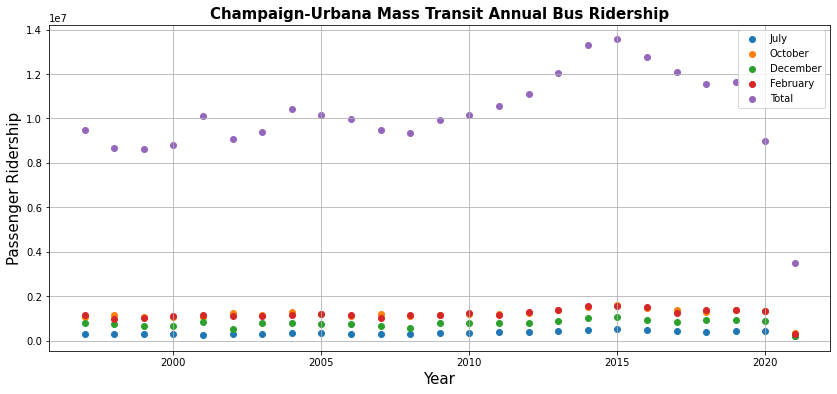

In [6]:
#### Now we are going to plot the graph using matplotlib to visualize our data input
x = df['Year'] #x-axis is going to be our year
figure = plt.figure(figsize=(14,6)) #adjust the figure size
plt.title('Champaign-Urbana Mass Transit Annual Bus Ridership',fontweight='bold',fontsize=15) #add the title
plt.grid() #add the grid
plt.xlabel('Year',fontsize=15) #add the x-axis label
plt.ylabel('Passenger Ridership',fontsize=15) #add the y-axis label
temp = df.drop('Year',axis=1) #Just drop the year column because we are not going to use that for our data analytics
for i in temp.columns: #Now for each column in our python dataframe column
    plt.scatter(x,temp[i]) #I want to keep plotting
    
plt.legend(temp) #Don't forget to add the legend

Text(0.5, 1.0, 'Passenger Ridership vs Months')

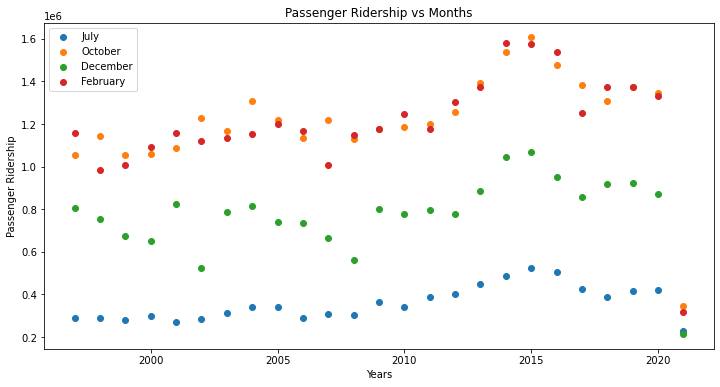

In [7]:
months1 = df.drop('Year',axis=1)
months = months1.drop('Total',axis=1)
plt.figure(figsize=(12,6))
for i in months.columns:
    plt.scatter(x,months[i])
plt.legend(months)
plt.xlabel('Years')
plt.ylabel('Passenger Ridership')
plt.title('Passenger Ridership vs Months')

In [8]:
#The function which uses the linear regression method to determine the line of best fit
def line_of_best_fit(x,temp,month_name,degree,co): 
    linear_reg = np.polyfit(x,temp,deg = degree)
    linear_trend = np.polyval(linear_reg,x) #slope and y intercept
    plt.scatter(x,temp,label='plots',color='b')
    plt.plot(x,linear_trend,label='line of best fit',color=co)
    plt.xlabel('Years')
    plt.ylabel('Passenger Ridership')
    plt.title(month_name+' Ridership')
    plt.legend()
    plt.show()
    return figure

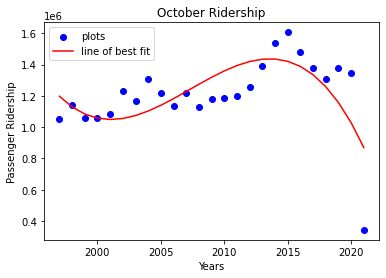

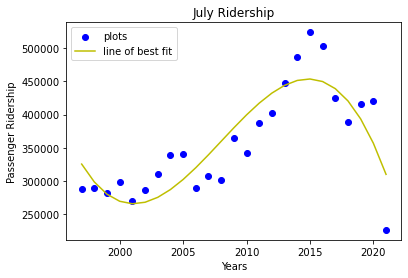

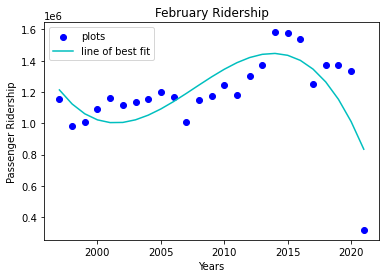

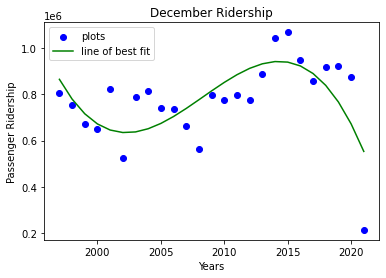

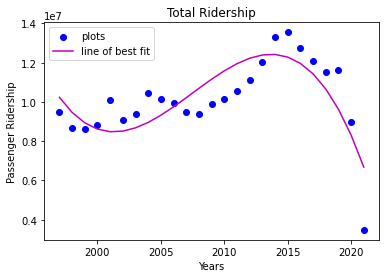

In [9]:
october = 'October'
linear_trend = line_of_best_fit(x,months[october],october,3,'r')

july = 'July'
linear_trend = line_of_best_fit(x,months[july],july,3,'y')

february = 'February'
linear_trend = line_of_best_fit(x,months[february],february,3,'c')

december = 'December'
linear_trend = line_of_best_fit(x,months[december],december,3,'g')

total = 'Total'
linear_trend = line_of_best_fit(x,months1[total],total,3,'m')

# 02. Machine Learning and Dataset Training

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

### Decision Tree 

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [12]:
y_feat = df.Total #The total is going to be the y-axis
featured_axis = ['Year','July','October','December','February'] #The featured axis are the months
x_feat = df[featured_axis] #The featured axis will be stored into the x featured

##############Dataset Training############
pass_decision_model = DecisionTreeRegressor() #DecisionTreeRegressor is called
pass_decision_model.fit(x_feat, y_feat) #Model is fitted accordingly
predicted_decision_pass = pass_decision_model.predict(x_feat) #Prediction is made
mean_absolute_error(y_feat, predicted_decision_pass) #MAE value of 0 means perfect model

0.0

In [13]:
train_x, val_x, train_y, val_y = train_test_split(x_feat, y_feat, random_state = 0)
# Define the model using DecisionTreeRegressor
pass_decision_model2 = DecisionTreeRegressor()
# Fit the model with trained x dataset and y dataset
pass_decision_model2.fit(train_x, train_y)

# Approximate predicted passenger ridership on validation data
val_predict = pass_decision_model2.predict(val_x)
print(mean_absolute_error(val_y, val_predict)) #maybe not the best model

441778.4285714286


### Random Forest 

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

pass_forest_model = RandomForestRegressor(random_state=1)
pass_forest_model.fit(train_x, train_y)
pass_forest_preds = pass_forest_model.predict(val_x)
print(mean_absolute_error(val_y, pass_forest_preds))

350535.9885714283


# 04. Time Series Forecasting 

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [16]:
time_data_frame

,Year,July,October,December,February,Total
0,1997,287136,1052714,807508,1157678,9501302.0
1,1998,289269,1142300,753231,982453,8670906.0
2,1999,281914,1055683,673696,1006772,8628101.0
3,2000,297848,1060153,650067,1091131,8800655.0
4,2001,270213,1085119,825356,1159928,10102665.0
5,2002,286552,1227976,524747,1118989,9084277.0
6,2003,311041,1169216,787201,1133363,9369218.0
7,2004,338494,1305943,813161,1154057,10435923.0
8,2005,341083,1217625,739941,1200637,10136585.0
9,2006,289169,1135129,736504,1167974,9958497.0


In [17]:
df = {}
df['February'] = time_data_frame.iloc[:,4]
df['July'] = time_data_frame.iloc[:,1]
df['October'] = time_data_frame.iloc[:,2]
df['December'] = time_data_frame.iloc[:,3]
time_series = pd.DataFrame(df)

In [18]:
time_series

,February,July,October,December
0,1157678,287136,1052714,807508
1,982453,289269,1142300,753231
2,1006772,281914,1055683,673696
3,1091131,297848,1060153,650067
4,1159928,270213,1085119,825356
5,1118989,286552,1227976,524747
6,1133363,311041,1169216,787201
7,1154057,338494,1305943,813161
8,1200637,341083,1217625,739941
9,1167974,289169,1135129,736504


In [19]:
matrix = np.zeros((25,4))
col_index = 0
for cols in time_series.columns:
    matrix[:,col_index] = time_series[cols].values[:]
    col_index += 1

In [20]:
x = []
y = []
for row in range(25):
    for col in range(4):
        y.append(matrix[row][col])

print(y)



[1157678.0, 287136.0, 1052714.0, 807508.0, 982453.0, 289269.0, 1142300.0, 753231.0, 1006772.0, 281914.0, 1055683.0, 673696.0, 1091131.0, 297848.0, 1060153.0, 650067.0, 1159928.0, 270213.0, 1085119.0, 825356.0, 1118989.0, 286552.0, 1227976.0, 524747.0, 1133363.0, 311041.0, 1169216.0, 787201.0, 1154057.0, 338494.0, 1305943.0, 813161.0, 1200637.0, 341083.0, 1217625.0, 739941.0, 1167974.0, 289169.0, 1135129.0, 736504.0, 1007102.0, 306992.0, 1219370.0, 663304.0, 1146354.0, 301446.0, 1129080.0, 563233.0, 1175703.0, 365289.0, 1178063.0, 798794.0, 1246451.0, 342639.0, 1188246.0, 777198.0, 1177828.0, 387210.0, 1201806.0, 797556.0, 1305142.0, 401883.0, 1254804.0, 777617.0, 1374653.0, 447178.0, 1391576.0, 887209.0, 1582330.0, 487363.0, 1538309.0, 1044064.0, 1576687.0, 524178.0, 1606340.0, 1068610.0, 1537540.0, 503481.0, 1478275.0, 949030.0, 1251352.0, 424915.0, 1380990.0, 857837.0, 1375553.0, 389398.0, 1310380.0, 917782.0, 1375560.0, 415476.0, 1375516.0, 920718.0, 1331716.0, 420729.0, 1346402.0, 

In [21]:
start_year = 1997
for i in range(len(y)):
    if i % 4 == 0:
        x.append('02-01-'+str(start_year))
    elif i % 4 == 1:
        x.append('07-01-'+str(start_year))
    elif i % 4 == 2:
        x.append('10-01-'+str(start_year))
    elif i % 4 == 3:
        x.append('12-01-'+str(start_year))
        start_year+= 1

In [22]:
print(x)

['02-01-1997', '07-01-1997', '10-01-1997', '12-01-1997', '02-01-1998', '07-01-1998', '10-01-1998', '12-01-1998', '02-01-1999', '07-01-1999', '10-01-1999', '12-01-1999', '02-01-2000', '07-01-2000', '10-01-2000', '12-01-2000', '02-01-2001', '07-01-2001', '10-01-2001', '12-01-2001', '02-01-2002', '07-01-2002', '10-01-2002', '12-01-2002', '02-01-2003', '07-01-2003', '10-01-2003', '12-01-2003', '02-01-2004', '07-01-2004', '10-01-2004', '12-01-2004', '02-01-2005', '07-01-2005', '10-01-2005', '12-01-2005', '02-01-2006', '07-01-2006', '10-01-2006', '12-01-2006', '02-01-2007', '07-01-2007', '10-01-2007', '12-01-2007', '02-01-2008', '07-01-2008', '10-01-2008', '12-01-2008', '02-01-2009', '07-01-2009', '10-01-2009', '12-01-2009', '02-01-2010', '07-01-2010', '10-01-2010', '12-01-2010', '02-01-2011', '07-01-2011', '10-01-2011', '12-01-2011', '02-01-2012', '07-01-2012', '10-01-2012', '12-01-2012', '02-01-2013', '07-01-2013', '10-01-2013', '12-01-2013', '02-01-2014', '07-01-2014', '10-01-2014', '12-0

In [39]:
df = {}
df['Time'] = x
df['Passengers'] = y

In [40]:
modified_time_df = pd.DataFrame(df)

In [43]:
modified_time_df = modified_time_df.set_index('Time')

<AxesSubplot:xlabel='Time'>

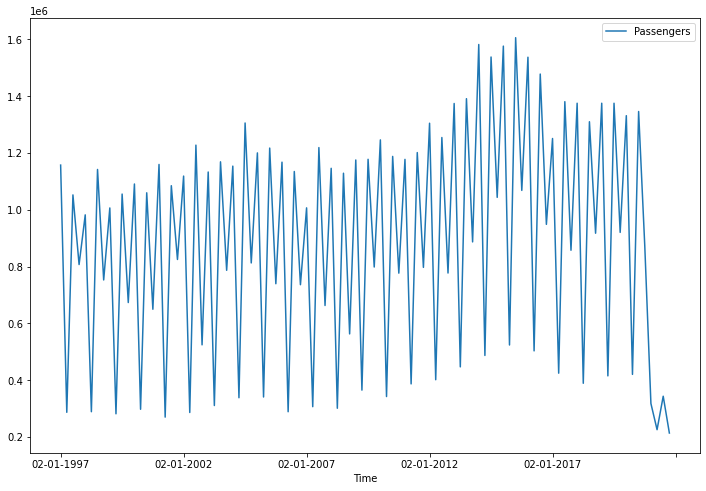

In [44]:
modified_time_df.plot(figsize=(12,8))